# 2022.16 - Back2VizBasics Exercise - Build a Treemap
#### Summary: The data week’s challenge is Star Trek episode by TV series data provided by our friends at #DataFamCon. DataFam Con is hosted by Nicole Klassen and Christina Gorga. It is a Data Viz Community Project celebrating everything pop culture!

Note: Utilized a variety of Stackoverflow & Python blog resources to help me with this data exercise. 
#### Created by: Ghafar Shah | Date: August 2, 2022 | Data Source: https://data.world/back2vizbasics/2022week-16-build-a-treemap


In [105]:
# Matplotlib, Seaborn, Pandas and treemap (squarify) imports
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns
import pandas as pd

In [96]:
# Connects to the Star Trek data file...
star_trek = pd.read_excel('Enter your URL path here!')

# Displays the first few records in the star trek dataframe
star_trek.head()

,Series,EpisodeTitle,Episode,Original Airdate
0,Discovery,The Vulcan Hello,1x01,9/24/2017
1,Discovery,Battle at the Binary Stars,1x02,9/24/2017
2,Discovery,Context Is for Kings,1x03,10/1/2017
3,Discovery,The Butcher's Knife Cares Not for the Lamb's Cry,1x04,10/8/2017
4,Discovery,Choose Your Pain,1x05,10/15/2017


In [97]:
# We need to count the number of episodes by Series...
n = star_trek.groupby('Series')[['EpisodeTitle']].count()

In [98]:
# Displays updated dataframe, n
n

,EpisodeTitle
Series,
Deep Space Nine,173
Discovery,55
Enterprise,97
Lower Decks,30
Picard,30
Prodigy,19
Strange New Worlds,10
The Animated Series,22
The Next Generation,176


In [99]:
# Let's sort the Series by number of episodes...displays the updated dataframe, n
n.sort_values('EpisodeTitle', ascending=False, inplace=True)
n

,EpisodeTitle
Series,
The Next Generation,176
Deep Space Nine,173
Voyager,168
Enterprise,97
The Original Series,80
Discovery,55
Lower Decks,30
Picard,30
The Animated Series,22


In [100]:
# We don't want Series column as an index so let's get rid of that..
n.reset_index(inplace=True, level=['Series'])

In [101]:
# Displays updated dataframe, n below:
n

,Series,EpisodeTitle
0,The Next Generation,176
1,Deep Space Nine,173
2,Voyager,168
3,Enterprise,97
4,The Original Series,80
5,Discovery,55
6,Lower Decks,30
7,Picard,30
8,The Animated Series,22
9,Prodigy,19


In [102]:
# Renames the column, EpisodeTitle to TotalEpisodes
n.rename(columns = {'EpisodeTitle':'TotalEpisodes'}, inplace = True)
n

,Series,TotalEpisodes
0,The Next Generation,176
1,Deep Space Nine,173
2,Voyager,168
3,Enterprise,97
4,The Original Series,80
5,Discovery,55
6,Lower Decks,30
7,Picard,30
8,The Animated Series,22
9,Prodigy,19


In [103]:
# Creates a new column, Label, that concated the Series name and number of aired episodes.
# This field will be used later for the treemap analysis.
n["Label"] = n["Series"] + ": " + n["TotalEpisodes"].astype("str")

# Diplays the updated dataframe called "n":
n

,Series,TotalEpisodes,Label
0,The Next Generation,176,The Next Generation: 176
1,Deep Space Nine,173,Deep Space Nine: 173
2,Voyager,168,Voyager: 168
3,Enterprise,97,Enterprise: 97
4,The Original Series,80,The Original Series: 80
5,Discovery,55,Discovery: 55
6,Lower Decks,30,Lower Decks: 30
7,Picard,30,Picard: 30
8,The Animated Series,22,The Animated Series: 22
9,Prodigy,19,Prodigy: 19


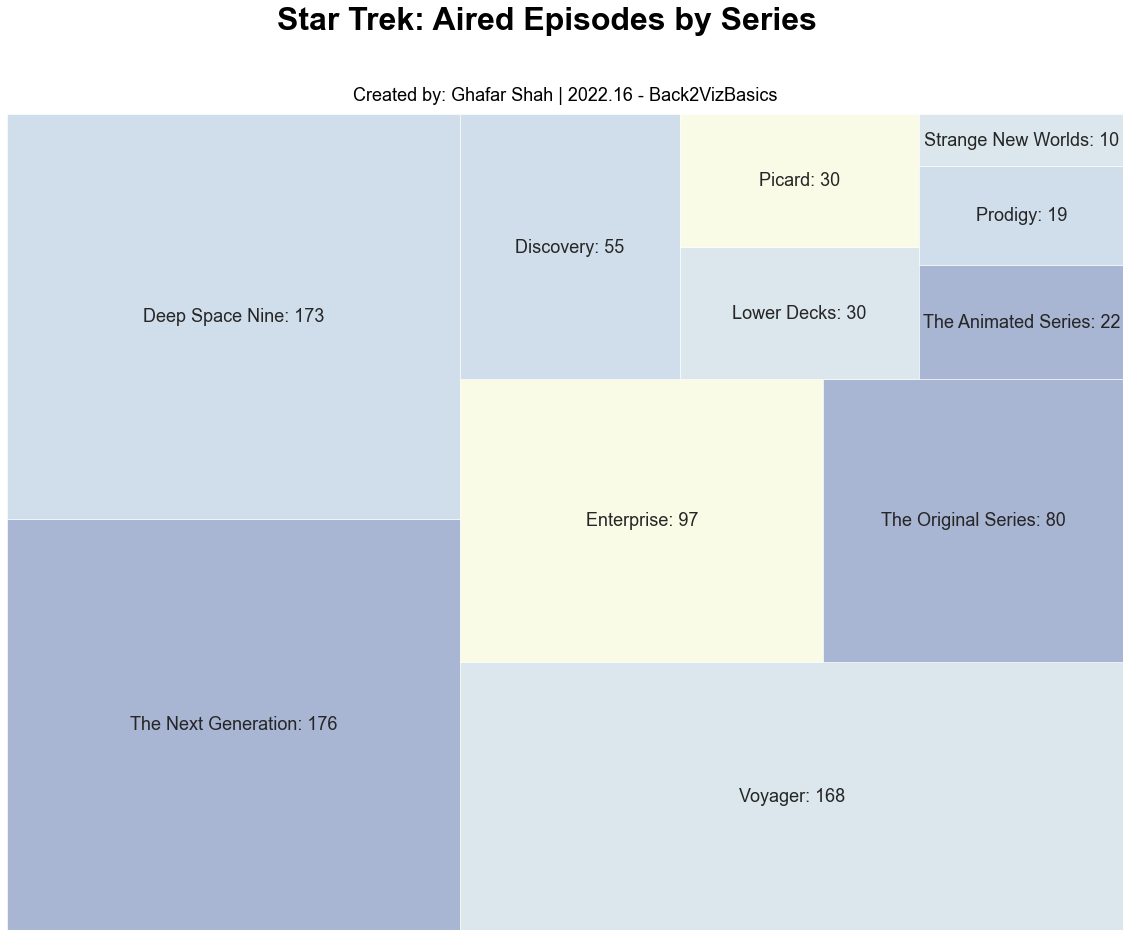

In [104]:
#Use custom colors from colorhunt.co for the treemap
colors=['#6E85B7','#B2C8DF','#C4D7E0','#F8F9D7']

# Sets the font to Arial
sns.set(font="Arial")

# Create the treemap plot using the TotalEpisodes column for size and new Label column for labels
squarify.plot(sizes=n['TotalEpisodes'], alpha=.6, text_kwargs={'fontsize': 18}, color=colors, label=n['Label'])
sns.set(rc={'figure.facecolor':'white'})

# Turns off the plot axis scales
plt.axis('off')

# Sets the figure size
sns.set(rc={'figure.figsize':(20,15)})

# Adding a Title and Subtitle
plt.suptitle("Star Trek: Aired Episodes by Series",fontsize=32, fontweight='bold',color="black")
plt.title("Created by: Ghafar Shah | 2022.16 - Back2VizBasics", fontsize=18,color="black", y=1.01)

# Exports the chart as a PNG. Use bbox_inches so image fits entire PNG.
plt.savefig('Star_Trek_AiredEpisodes_TreeMap.png', bbox_inches='tight')

# Shows the plot after the export above
plt.show()